In [1]:
# get tensorflow 

import tensorflow as tf
print(tf.__version__)

2.13.0


In [2]:
# get dataset from sklearn

from sklearn.datasets import load_breast_cancer
data_bc=load_breast_cancer()

In [3]:
# explore dataset

data_bc.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
print(data_bc.data.shape,'\n\n',data_bc.feature_names,'\n\n',data_bc.target.shape,'\n\n',data_bc.target_names)

(569, 30) 

 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'] 

 (569,) 

 ['malignant' 'benign']


In [6]:
data_bc.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [7]:
# split data into train and test datasets

from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test=train_test_split(data_bc.data,data_bc.target,test_size=0.2,random_state=42) # order is important 

In [9]:
m,n=x_train.shape # m number of examples , n number of features

In [10]:
#normalize the data 

from sklearn.preprocessing import StandardScaler

In [11]:
ss=StandardScaler()

x_train=ss.fit_transform(x_train) # parameters are computed as well 

x_test=ss.transform(x_test) # only transform, using the above found parameters 

In [12]:
# import joblib
# joblib.dump(ss,'ss.bin',compress=True)
# ss_loaded=joblib.load('ss.bin')
# ss_loaded.transform(x_test)

In [13]:
n=x_train.shape[1]
print(n) # 32 

30


In [14]:
# build model 


btc=tf.keras.models.Sequential()
btc.add(tf.keras.layers.Dense(1,input_shape=(n,),activation='sigmoid')) # input size  -- 1D # m,d

btc.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
btc.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
btc_hist=btc.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,verbose=1) # time involved 


Epoch 1/100
15/15 [==============================] - 1s 26ms/step - loss: 1.1176 - accuracy: 0.3231 - val_loss: 1.0306 - val_accuracy: 0.3684
Epoch 2/100
15/15 [==============================] - 0s 6ms/step - loss: 0.9852 - accuracy: 0.3978 - val_loss: 0.9061 - val_accuracy: 0.4298
Epoch 3/100
15/15 [==============================] - 0s 7ms/step - loss: 0.8670 - accuracy: 0.4527 - val_loss: 0.7971 - val_accuracy: 0.5000
Epoch 4/100
15/15 [==============================] - 0s 7ms/step - loss: 0.7644 - accuracy: 0.5253 - val_loss: 0.7034 - val_accuracy: 0.6140
Epoch 5/100
15/15 [==============================] - 0s 6ms/step - loss: 0.6782 - accuracy: 0.6132 - val_loss: 0.6254 - val_accuracy: 0.6754
Epoch 6/100
15/15 [==============================] - 0s 6ms/step - loss: 0.6047 - accuracy: 0.6769 - val_loss: 0.5607 - val_accuracy: 0.7456
Epoch 7/100
15/15 [==============================] - 0s 7ms/step - loss: 0.5458 - accuracy: 0.7297 - val_loss: 0.5082 - val_accuracy: 0.7807
Epoch 8/100


Epoch 59/100
15/15 [==============================] - 0s 6ms/step - loss: 0.1263 - accuracy: 0.9758 - val_loss: 0.1085 - val_accuracy: 0.9912
Epoch 60/100
15/15 [==============================] - 0s 6ms/step - loss: 0.1250 - accuracy: 0.9758 - val_loss: 0.1075 - val_accuracy: 0.9912
Epoch 61/100
15/15 [==============================] - 0s 6ms/step - loss: 0.1239 - accuracy: 0.9758 - val_loss: 0.1064 - val_accuracy: 0.9912
Epoch 62/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1227 - accuracy: 0.9758 - val_loss: 0.1055 - val_accuracy: 0.9912
Epoch 63/100
15/15 [==============================] - 0s 7ms/step - loss: 0.1216 - accuracy: 0.9758 - val_loss: 0.1045 - val_accuracy: 0.9912
Epoch 64/100
15/15 [==============================] - 0s 6ms/step - loss: 0.1206 - accuracy: 0.9758 - val_loss: 0.1035 - val_accuracy: 0.9912
Epoch 65/100
15/15 [==============================] - 0s 6ms/step - loss: 0.1195 - accuracy: 0.9758 - val_loss: 0.1026 - val_accuracy: 0.9912
Epoch 

In [16]:
print(btc.metrics_names)
print(btc.evaluate(x_train,y_train,verbose=0))
print(btc.evaluate(x_test,y_test,verbose=0))

['loss', 'accuracy']
[0.09478165954351425, 0.9824175834655762]
[0.08142799884080887, 0.9912280440330505]


In [17]:
# visualize loss and accuracy 

import matplotlib.pyplot as plt

In [18]:
btc_hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

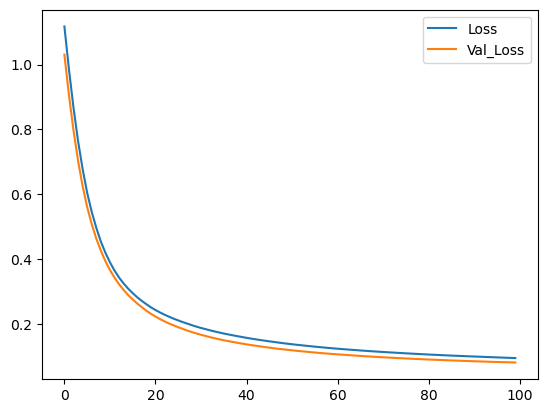

In [19]:
plt.plot(btc_hist.history['loss'],label='Loss')
plt.plot(btc_hist.history['val_loss'],label='Val_Loss')
plt.legend()
plt.show()

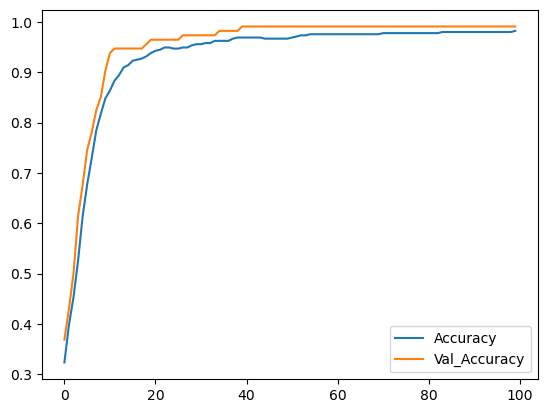

In [20]:
plt.plot(btc_hist.history['accuracy'],label='Accuracy')
plt.plot(btc_hist.history['val_accuracy'],label='Val_Accuracy')
plt.legend()
plt.show()

In [21]:
# make predictions 

In [22]:
x=x_test[20]
print(x.shape)
x=x.reshape(1,-1) 
print(x.shape)


y=y_test[20]
print(y)

(30,)
(1, 30)
0


In [23]:
pred_prob=btc.predict(x,verbose=0)  # returns probability of class being 1

In [24]:
if pred_prob[0][0]<0.5:
  print('Class 0')
else:
  print('Class 1')

Class 1


In [25]:
pred_prob

array([[0.8043532]], dtype=float32)